# Decision Trees & Random Forests

**Libraries Used:** `pandas`, `numpy`, `matplotlib`, `seaborn`, `scikit-learn`

---

## Table of Contents
1. Introduction
2. Decision Tree Theory
3. Random Forest Theory
4. Dataset Overview
5. Data Preprocessing
6. Decision Tree Implementation
7. Random Forest Implementation
8. Model Evaluation & Comparison
9. Feature Importance
10. Conclusion


## 1️⃣ Introduction

In this notebook, we explore **Decision Trees** and **Random Forests**, two fundamental supervised learning algorithms for classification and regression tasks.

**Objectives:**
- Understand how Decision Trees work
- Learn about Random Forest as an ensemble method
- Implement both algorithms using `scikit-learn`
- Evaluate models using standard metrics
- Analyze feature importance

## 2️⃣ Decision Tree Theory

- **Decision Tree** is a tree-like structure used to make decisions based on feature values.
- Each **internal node** represents a feature, each **branch** a decision rule, and each **leaf node** an outcome.
- **Key concepts:**
  - **Entropy & Information Gain**: Measure uncertainty and select features that best split the data
  - **Gini Impurity**: Alternative to entropy to measure node purity
  - **Overfitting**: Trees can perfectly memorize training data → limit depth or prune

- Pros:
  - Easy to interpret
  - Handles both numerical and categorical data
- Cons:
  - Prone to overfitting
  - Sensitive to small data changes

## 3️⃣ Random Forest Theory

- **Random Forest** is an **ensemble of Decision Trees**.
- Each tree is trained on a random subset of the data (bagging) and random subset of features.
- Predictions are made by **majority voting** (classification) or averaging (regression).

- Benefits:
  - Reduces overfitting
  - Improves generalization
  - Handles high-dimensional datasets

- Hyperparameters:
  - `n_estimators`: Number of trees
  - `max_depth`: Maximum depth of each tree
  - `min_samples_split`: Minimum samples required to split a node
  - `max_features`: Number of features considered for splitting

## 4️⃣ Dataset Overview

We will use the **Iris dataset** for classification:

- 150 samples, 4 features:
  - Sepal Length
  - Sepal Width
  - Petal Length
  - Petal Width
- Target: 3 classes (Setosa, Versicolor, Virginica)

**Why Iris?**  
- Small, clean dataset for understanding Decision Trees
- Perfect for classification visualization

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')

# Quick data check
X.head(), y.value_counts()

(   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                5.1               3.5                1.4               0.2
 1                4.9               3.0                1.4               0.2
 2                4.7               3.2                1.3               0.2
 3                4.6               3.1                1.5               0.2
 4                5.0               3.6                1.4               0.2,
 species
 0    50
 1    50
 2    50
 Name: count, dtype: int64)

## 5️⃣ Data Preprocessing

Steps:
1. Check for missing values
2. Train-test split (80% train, 20% test)
3. Standardization is optional for Decision Trees (not required)

In [3]:
# Check for missing values
print(X.isnull().sum())

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64
Training samples: 120
Testing samples: 30


## 6️⃣ Decision Tree Implementation

- Using `DecisionTreeClassifier` from scikit-learn
- Default criterion: Gini impurity
- Limiting depth to avoid overfitting

Accuracy: 0.9666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



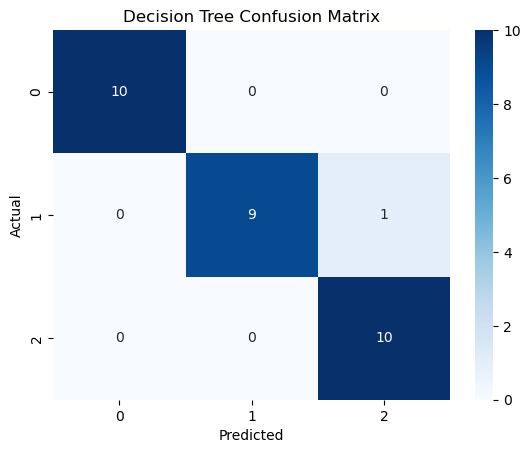

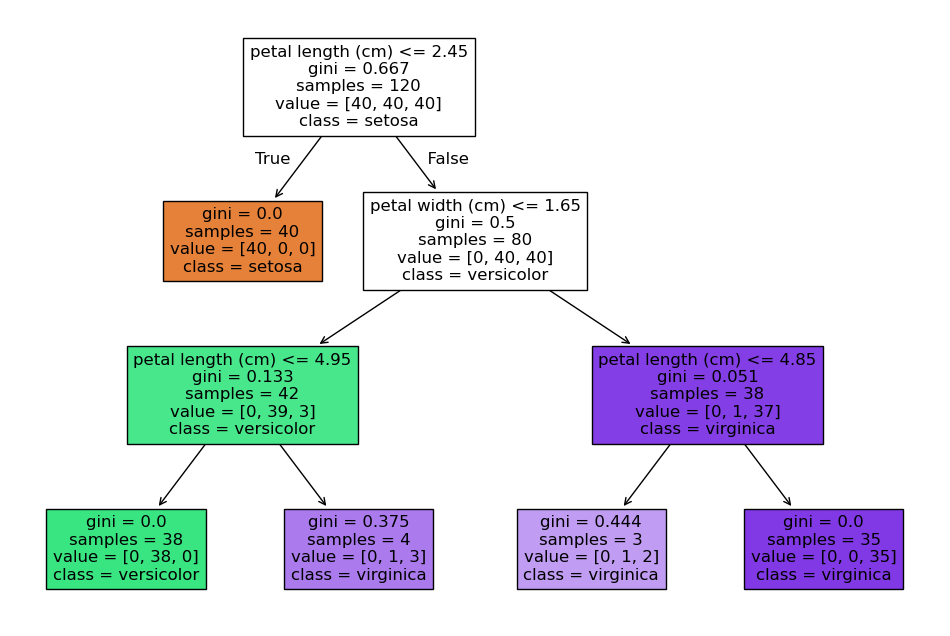

In [5]:
# Initialize Decision Tree
dtree = DecisionTreeClassifier(max_depth=3, random_state=42)
dtree.fit(X_train, y_train)

# Predictions
y_pred_dt = dtree.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, cmap='Blues', fmt='d')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Visualize Tree
plt.figure(figsize=(12,8))
plot_tree(dtree, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()


## 7️⃣ Random Forest Implementation

- Using `RandomForestClassifier`
- Ensemble of multiple trees
- Evaluate improvement over a single Decision Tree

Accuracy: 0.9666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



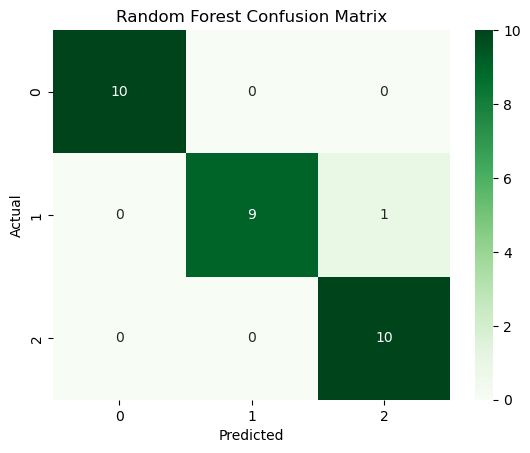

In [6]:
# Initialize Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap='Greens', fmt='d')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## 8️⃣ Feature Importance

- Random Forest can provide **feature importance** scores
- Helps identify which features contribute most to prediction

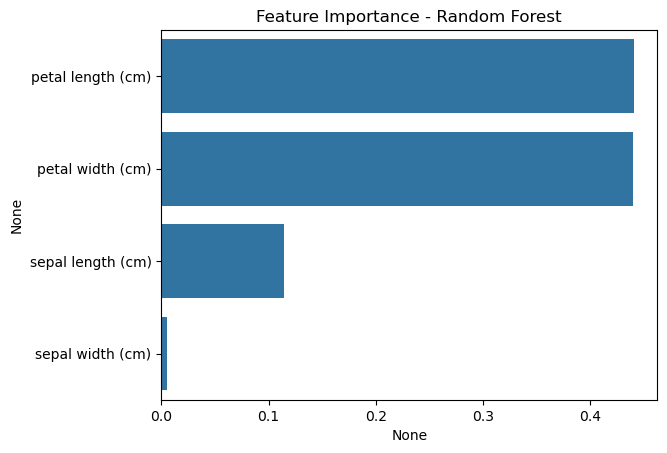

In [7]:
# Feature importance
importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x=importance, y=importance.index)
plt.title("Feature Importance - Random Forest")
plt.show()


## 9️⃣ Conclusion

- **Decision Tree** is easy to interpret but can overfit easily.  
- **Random Forest** reduces overfitting and improves accuracy through ensemble learning.  
- Important insights:
  - Petal length & width are highly discriminative for Iris classification.
  - Hyperparameter tuning (`n_estimators`, `max_depth`) can improve performance.
- Next steps:
  - Explore Gradient Boosting (XGBoost, LightGBM)
  - Apply these models to larger real-world datasets
